In [21]:
import pandas as pd

iris_df = pd.read_csv("data/iris/iris.data", 
                      names=["sepal length", "sepal width", 
                             "petal length", "petal width", 
                             "class label"])
iris_df.head()

,sepal length,sepal width,petal length,petal width,class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


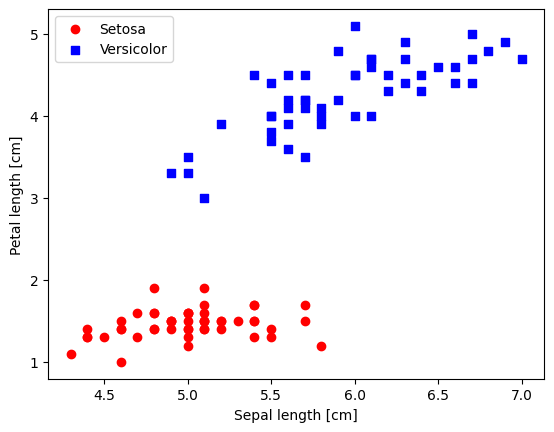

In [14]:
import matplotlib.pyplot as plt
import numpy as np

X = iris_df[["sepal length", "petal length"]].iloc[0:100].values
y = iris_df["class label"].iloc[0:100].values
# setosa 对应的类别标签为0
# versicolour 对应的类别标签为1
y = np.where(y == "Iris-setosa", 0, 1)

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [15]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X, y)

Perceptron(eta0=0.1, random_state=1)

In [22]:
from matplotlib.colors import ListedColormap 

def plot_decision_regions(X, y, classifier, resolution=0.02): 
    # 设置 marker 和 color map 
    markers = ('o', 's', '^', 'v', '<') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) 

    # 绘制决策边界 
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution)) 
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    lab = lab.reshape(xx1.shape) 
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max()) 

    # 绘制类别样本
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                    alpha=0.8, c=colors[idx], marker=markers[idx], 
                    label=f'Class {cl}', edgecolor='black')

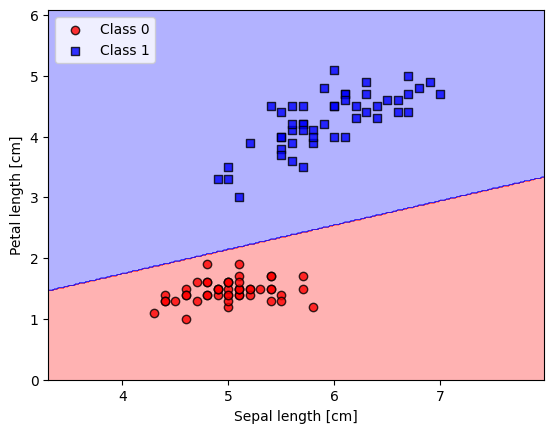

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()